## Observations and Insights

## Dependencies and starter code

In [17]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
study_data = pd.merge(mouse_metadata, study_results, on= 'Mouse ID',how= "left")

study_data.head(50)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


## Summary statistics

In [2]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

#Grouped by Regimen (drug)
study_grouped = study_data.groupby(["Drug Regimen"])

#mean
mean_tumor_volume = study_grouped["Tumor Volume (mm3)"].mean() 
print(f"The mean tumor volume in the mouse study is {mean_tumor_volume}")

#median
median_tumor_volume = study_grouped["Tumor Volume (mm3)"].median()
print(f"The median tumor volume in the mouse study is {mean_tumor_volume}")

#variance
var_tumor_volume = study_grouped["Tumor Volume (mm3)"].var()
print(f"The variance of the tumor volume in the mouse study is {var_tumor_volume}")

#standard deviation 
sd_tumor_volume = study_grouped["Tumor Volume (mm3)"].std()
print(f"The standard deviation of the tumor volume in the mouse study is {sd_tumor_volume}")

#standard error
sem_tumor_volume = study_grouped["Tumor Volume (mm3)"].sem()
print(f"The standard error of the tumor volume in the mouse study is {sem_tumor_volume}")

Tumor_vol_analysis_df = pd.DataFrame({"Mean Tumor Volume":mean_tumor_volume,
                                  "Median Tumor Volume":median_tumor_volume,
                                  "Variance Tumor Volume":var_tumor_volume,
                                  "Standard Deviation Tumor Volume":sd_tumor_volume,
                                  "Standard Error Tumor Volume":sem_tumor_volume})
Tumor_vol_analysis_df

The mean tumor volume in the mouse study is Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.322552
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64
The median tumor volume in the mouse study is Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.322552
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64
The variance of the tumor volume in the mouse study is Drug Regimen
Capomulin    24.947764
Ceftamin     39.290177
Infubinol    43.128684
Ketapril     68.553577
Naftisol     66.173479
Placebo      61.168083
Propriva     42.351070
Ramicane     23.486704
Stelasyn     59.450562
Zoniferol    48.533355
Name: Tumor Volume (mm3), dtype: float64
The

,Mean Tumor Volume,Median Tumor Volume,Variance Tumor Volume,Standard Deviation Tumor Volume,Standard Error Tumor Volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar plots

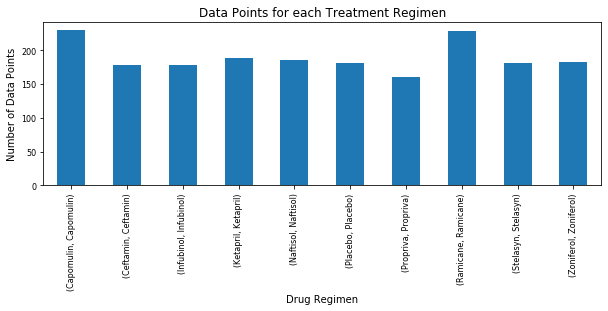

<Figure size 432x288 with 0 Axes>

In [3]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
Treatment_regimen = study_grouped["Drug Regimen"].value_counts()

Treatment_regimen.plot(kind="bar",figsize=(10,3),align = "center",fontsize =8)

#set title xlabel and ylabel
plt.title("Data Points for each Treatment Regimen")
plt.ylabel("Number of Data Points")
plt.xlabel("Drug Regimen")

plt.show()
plt.tight_layout()

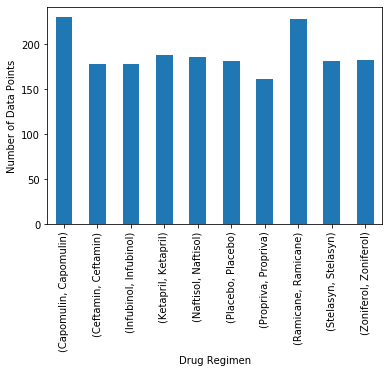

<Figure size 432x288 with 0 Axes>

In [4]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
# Create a bar chart based off of the group series from before
pyplot_data = Treatment_regimen.plot(kind='bar')

# Set the xlabel and ylabel 
pyplot_data.set_xlabel("Drug Regimen")
pyplot_data.set_ylabel("Number of Data Points")


plt.show()
plt.tight_layout()

## Pie plots

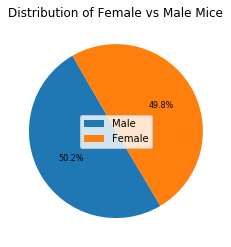

In [5]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mouse_data_gender = mouse_metadata["Sex"].value_counts()

pie_plot_mouse = mouse_data_gender.plot(kind='pie',autopct = '%1.1f%%',figsize=(6,4), labels=None, fontsize= 8, startangle = 120)

pie_plot_mouse.legend(loc="center", labels=mouse_data_gender.index)

pie_plot_mouse.set_title("Distribution of Female vs Male Mice")
pie_plot_mouse.set(ylabel="")

plt.show()

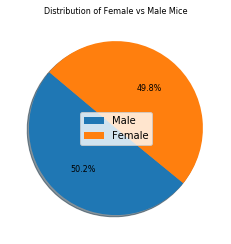

In [6]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.figure(figsize=(6,4))
plt.pie(mouse_data_gender,autopct = '%1.1f%%', shadow = True, startangle = 140, textprops={'fontsize': 8})

plt.title("Distribution of Female vs Male Mice", fontsize = 8)
plt.legend(loc="center", labels=mouse_data_gender.index)

plt.show()

## Quartiles, outliers and boxplots

In [8]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 

max_ = study_data.groupby(['Mouse ID']).max()
max_ = max_.reset_index()
max_merged = max_[['Mouse ID', 'Timepoint']].merge(study_data,
                                                  on = ['Mouse ID', 'Timepoint'], how = 'left')

cap = max_merged.loc[max_merged['Drug Regimen'] == 'Capomulin']['Tumor Volume (mm3)']
inf = max_merged.loc[max_merged['Drug Regimen'] == 'Infubinol']['Tumor Volume (mm3)']

cap_q = inf.quantile([.25,.5,.75])
c_l = cap_q[.25]
c_u = cap_q[.75]
c_i =c_u - c_l
l_b = c_l - (1.5*c_i)
u_b = c_u + (1.5*c_i)

print(f'{cap.loc[(cap< l_b)]})')
print(f'{cap.loc[(cap> u_b)]})')





61     30.485985
122    28.430964
125    33.329098
164    32.377357
175    23.343598
184    34.455298
193    31.023923
221    36.041047
227    28.484033
240    31.896238
Name: Tumor Volume (mm3), dtype: float64)
Series([], Name: Tumor Volume (mm3), dtype: float64))


{'whiskers': [<matplotlib.lines.Line2D at 0x1a1c28ec90>,
 'caps': [<matplotlib.lines.Line2D at 0x1a1c293790>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a1c28e090>,
 'medians': [<matplotlib.lines.Line2D at 0x1a1c28ed50>,
 'fliers': [<matplotlib.lines.Line2D at 0x1a1c29b710>,
 'means': []}

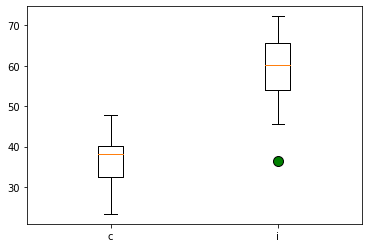

In [10]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
m = dict(markerfacecolor = 'green', markersize = 10)
plt.boxplot([cap,inf], labels = ['c', 'i'], flierprops = m)

## Line and scatter plots

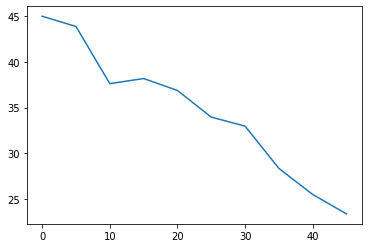

In [18]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

cap_table = study_data.loc[study_data['Drug Regimen'] == 'Capomulin']
mouse = cap_table.loc[cap_table['Mouse ID'] == 's185']
plt.plot(mouse['Timepoint'], mouse['Tumor Volume (mm3)'])

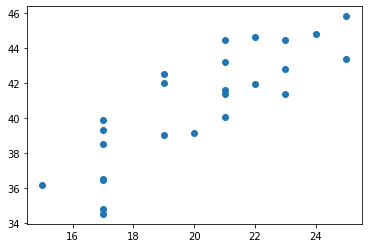

In [20]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

aver = cap_table.groupby(['Mouse ID']).mean()
plt.scatter(aver['Weight (g)'], aver['Tumor Volume (mm3)'])

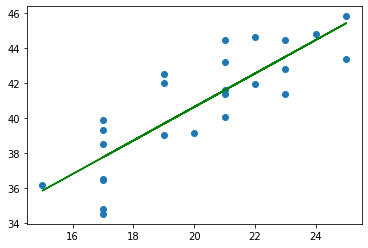

In [24]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
reg_line = st.linregress(aver['Weight (g)'], aver['Tumor Volume (mm3)'])
y_value = aver['Weight (g)']*reg_line[0]+reg_line[1]
plt.scatter(aver['Weight (g)'], aver['Tumor Volume (mm3)'])
plt.plot(aver['Weight (g)'], y_value, color = 'green')